In [2]:
import pandas as pd 

data_type = {"CustomerID": str}
df = pd.read_excel('Online Retail.xlsx', dtype = data_type)


In [3]:
#Data preprocessing

selected_variables = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

df_selected = df[selected_variables]

# Create aggregated variable (Amount)
df_selected['Total_Amount_Spent'] = df_selected['Quantity'] * df_selected['UnitPrice']

# Separate InvoiceDate into Date and Time
df_selected['Date'] = df_selected['InvoiceDate'].dt.date
df_selected['Time'] = df_selected['InvoiceDate'].dt.time

# Filter out rows without values in all variables 
df_selected = df_selected.dropna()

df_selected.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Amount_Spent,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00


In [4]:
#compare RFM variables to 2012-01-01 
today_date = pd.to_datetime("2012-01-01")

print(df_selected.dtypes)

# Group by Country, calculate Recency, Frequency, and Monetary variables
rfm_dataset = df_selected.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Calculate Recency
    'Quantity': 'count',  # Calculate Frequency
    'Total_Amount_Spent': 'sum'  # Calculate Monetary
})

# Rename the columns for clarity
rfm_dataset.rename(columns = {
    "InvoiceDate": "Recency", 
    "Quantity": 'Frequency',
    "Total_Amount_Spent": "Monetary"
    },
    inplace = True
)


rfm_dataset = rfm_dataset.merge(df_selected[['CustomerID', 'Country']], on='CustomerID', how='left')
rfm_dataset = rfm_dataset[["CustomerID", 'Country', 'Recency', 'Frequency', 'Monetary']]

# Filter rows with Monetary variable value not equal to 0
rfm_dataset = rfm_dataset[rfm_dataset['Monetary'] != 0]

# Display the result
rfm_dataset.head()

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                    object
Country                       object
Total_Amount_Spent           float64
Date                          object
Time                          object
dtype: object


,CustomerID,Country,Recency,Frequency,Monetary
2,12347,Iceland,24,182,4310.0
3,12347,Iceland,24,182,4310.0
4,12347,Iceland,24,182,4310.0
5,12347,Iceland,24,182,4310.0
6,12347,Iceland,24,182,4310.0


           Country  Total_Amount_Spent
35  United Kingdom         6767873.394
23     Netherlands          284661.540
10            EIRE          250285.220
14         Germany          221698.210
13          France          196712.840


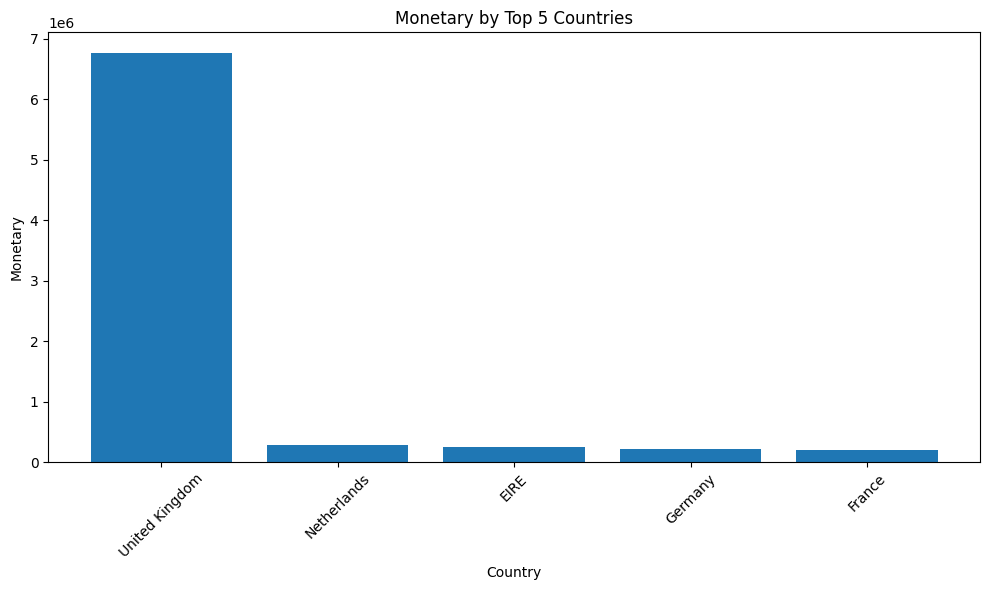

In [34]:
import matplotlib.pyplot as plt

Monetary_Country = df_selected[['Country', 'Total_Amount_Spent']]

Monetary_Country= Monetary_Country.groupby('Country')['Total_Amount_Spent'].sum().reset_index()

Monetary_Country = Monetary_Country.sort_values(by='Total_Amount_Spent', ascending=False)

Monetary_Country = Monetary_Country.head(5)

print(Monetary_Country)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(Monetary_Country['Country'], Monetary_Country['Total_Amount_Spent'])
plt.xlabel('Country')
plt.ylabel('Monetary')
plt.title('Monetary by Top 5 Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


